In [43]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('../data/clean_data.csv')
df.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,...,2,1,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,...,3,1,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,...,3,2,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,...,4,1,1091.0,F,1,S,Willy,Santantines,1,Earth


In [45]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passenger_group,passenger_number_in_group,total_luxury_amenities,num,group_size
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.735081,218.378026,441.890979,170.779491,301.722282,300.450270,4635.337471,1.511488,1433.221049,593.375482,2.022976
std,14.238958,641.766201,1568.038076,584.153630,1118.746785,1168.655639,2685.904299,1.042500,2807.369708,511.297918,1.577102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2306.250000,1.000000,0.000000,160.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4632.000000,1.000000,716.000000,409.000000,1.000000
75%,37.000000,42.750000,62.750000,23.000000,50.000000,36.000000,6924.750000,2.000000,1442.000000,992.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,35987.000000,1894.000000,8.000000


Text(0.5, 1.0, '"Target distribution: Transported"')

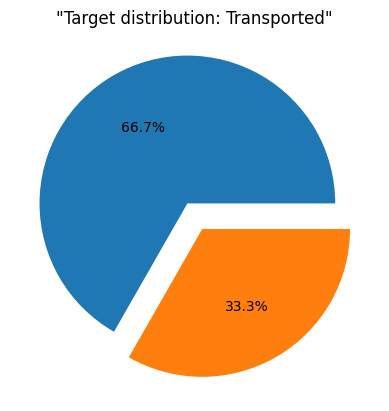

In [46]:
plt.pie(df['Transported'].value_counts(), explode=[0.1,0.1], autopct='%1.1f%%')
plt.title('"Target distribution: Transported"')

In [47]:
categorical_columns = df.select_dtypes(exclude = [int, float])
categorical_columns.columns

Index(['PassengerId', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Transported',
       'deck', 'side', 'first name', 'last name', 'HomePlanet'],
      dtype='object')

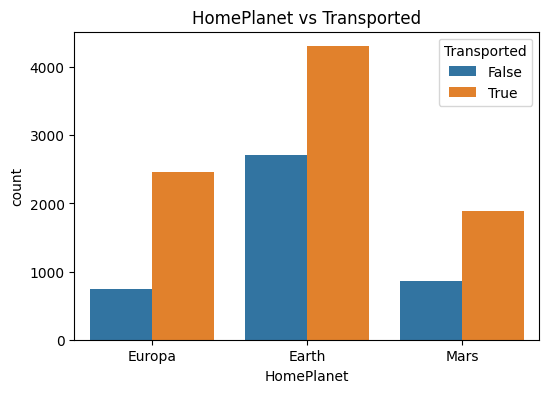

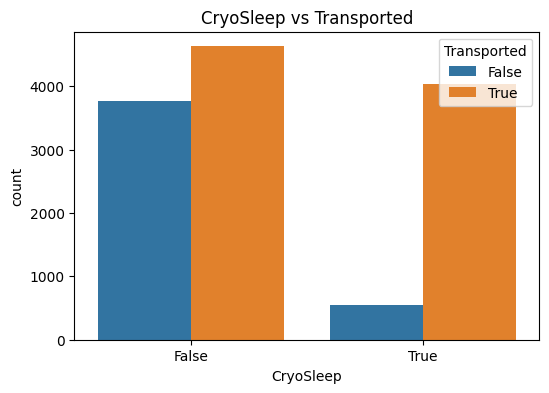

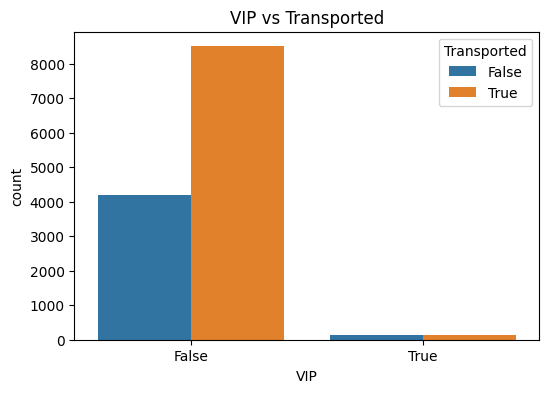

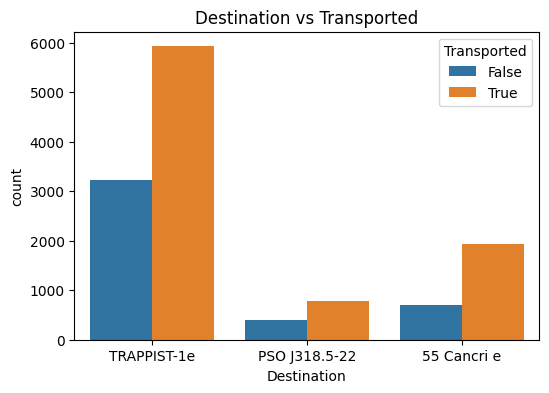

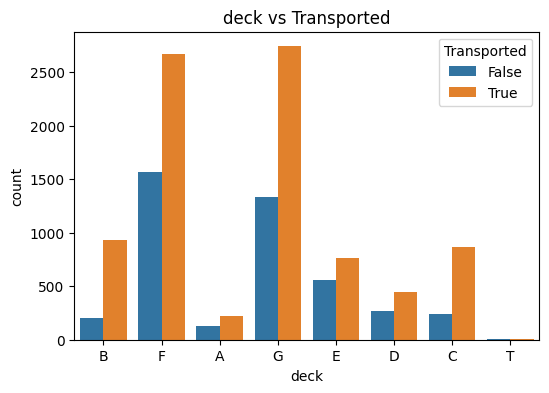

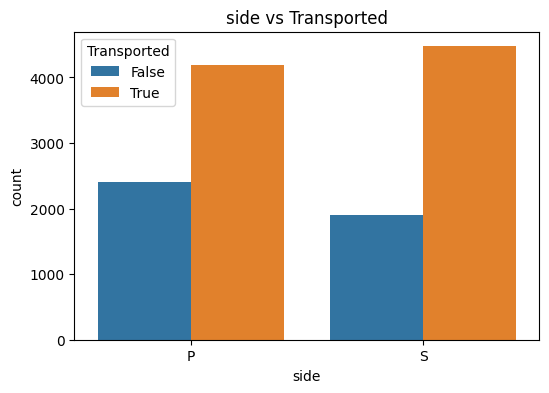

In [48]:
categorical_cols = ['HomePlanet','CryoSleep','VIP','Destination','deck','side']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Transported')
    plt.title(f"{col} vs Transported")
    plt.show()

<Axes: xlabel='passenger_number_in_group', ylabel='Count'>

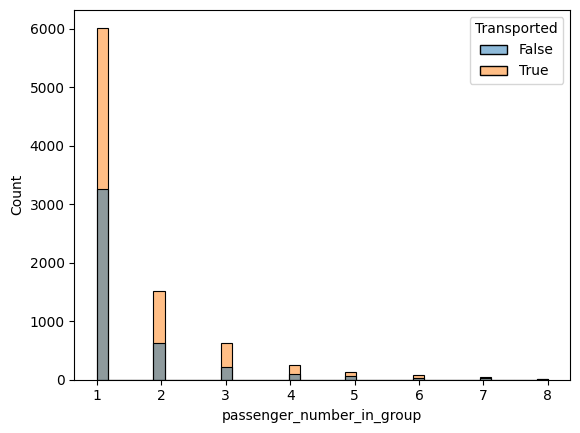

In [49]:
sns.histplot(data=df, x='passenger_number_in_group', hue='Transported', bins=40, kde=False)

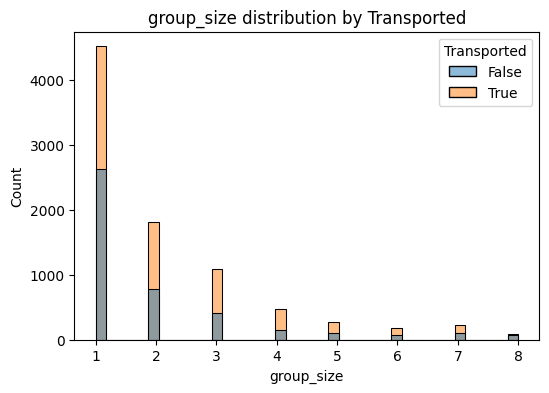

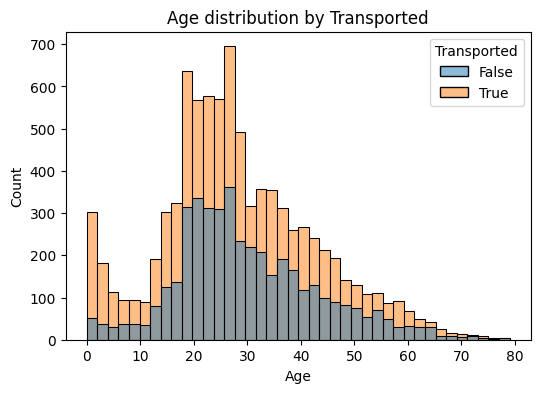

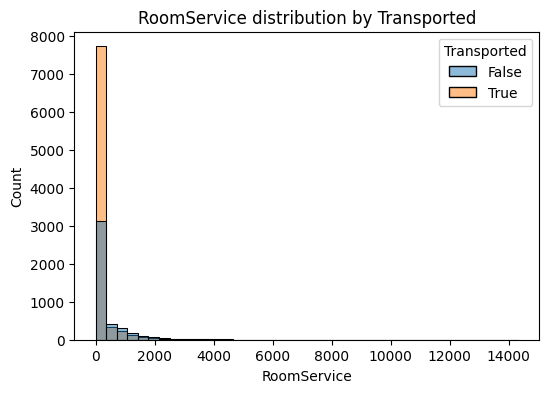

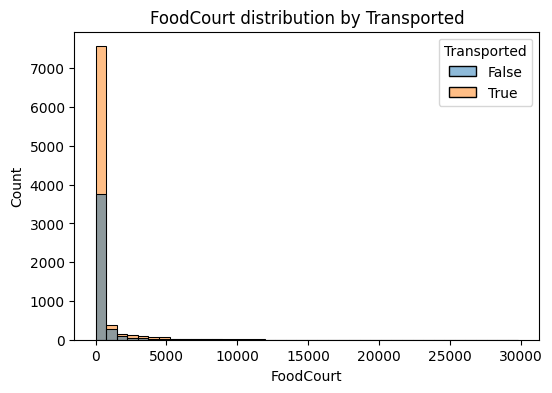

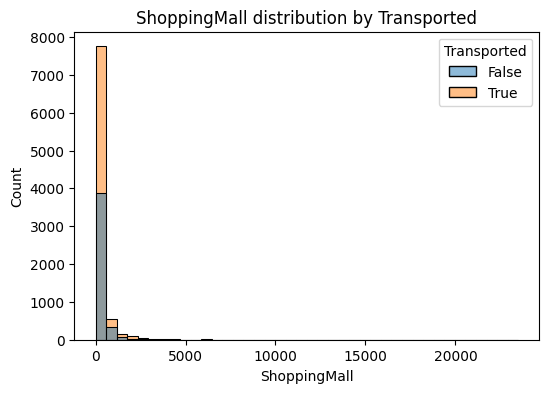

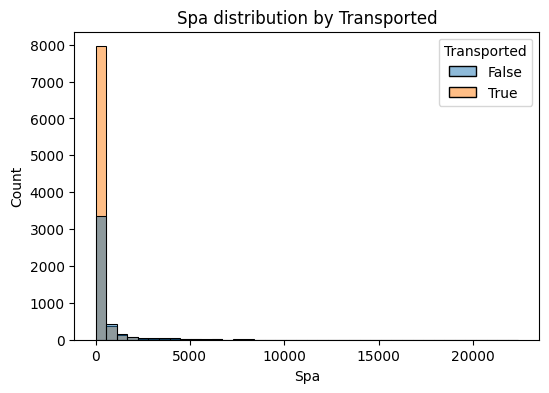

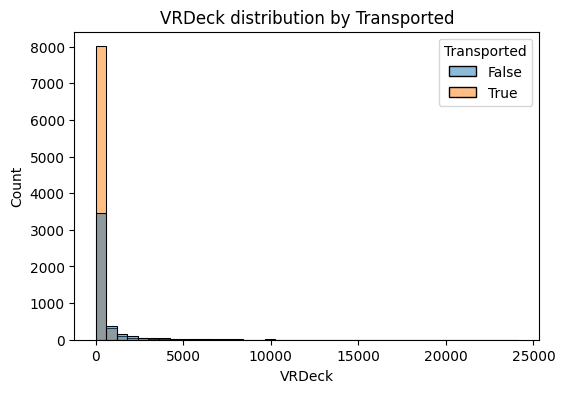

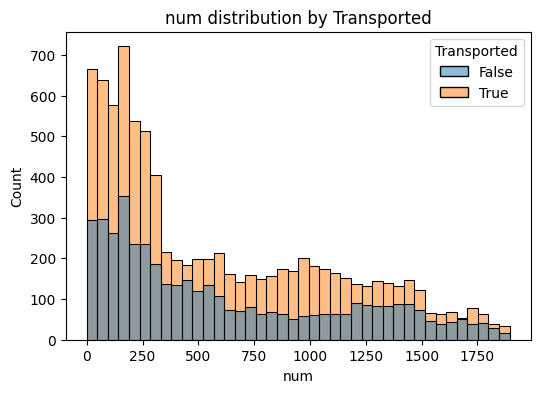

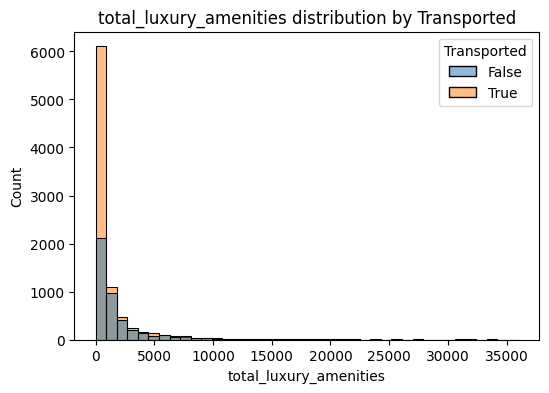

In [50]:
numeric_cols = ['group_size','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','num', 'total_luxury_amenities']
df[numeric_cols].describe()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Transported', bins=40, kde=False)
    plt.title(f"{col} distribution by Transported")
    plt.show()

In [51]:
def cabin_number_distribution(chunk):
    if chunk < 300:
        return 'chunk1'
    if chunk > 301 & chunk <600:
        return 'chunk2'
    if chunk > 601 & chunk < 1150:
        return 'chunk3'
    return 'chunk4'
    
df['cabin_number_distribution_chunk'] = df['num'].apply(cabin_number_distribution)

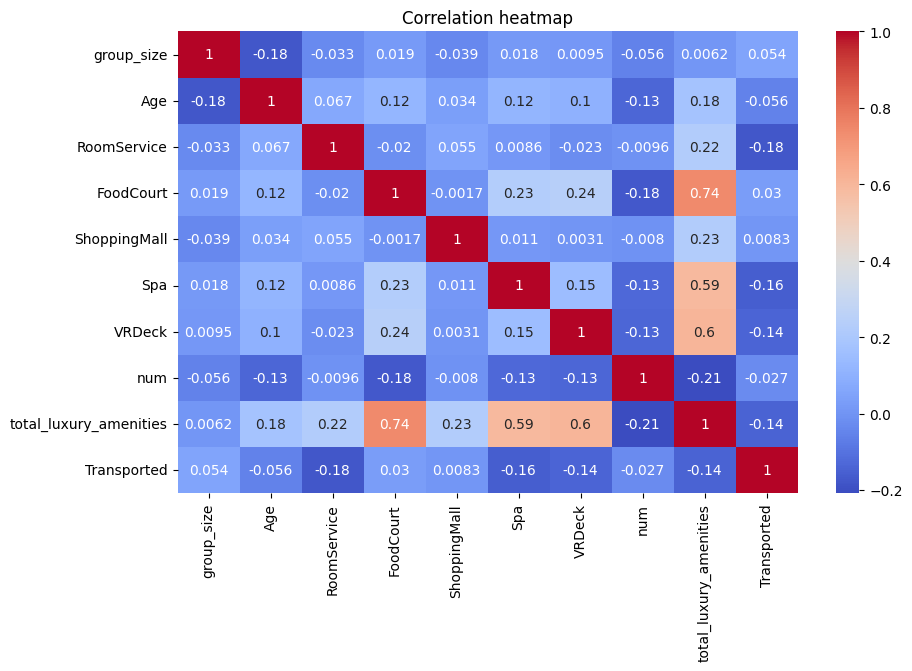

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols + ['Transported']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [53]:
df.head(5)

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet,cabin_number_distribution_chunk
0,0001_01,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,...,1,0.0,B,0,P,Maham,Ofracculy,1,Europa,chunk1
1,0002_01,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,...,1,736.0,F,0,S,Juanna,Vines,1,Earth,chunk1
2,0003_01,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,...,1,10383.0,A,0,S,Altark,Susent,2,Europa,chunk1
3,0003_02,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,...,2,5176.0,A,0,S,Solam,Susent,2,Europa,chunk1
4,0004_01,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,...,1,1091.0,F,1,S,Willy,Santantines,1,Earth,chunk1


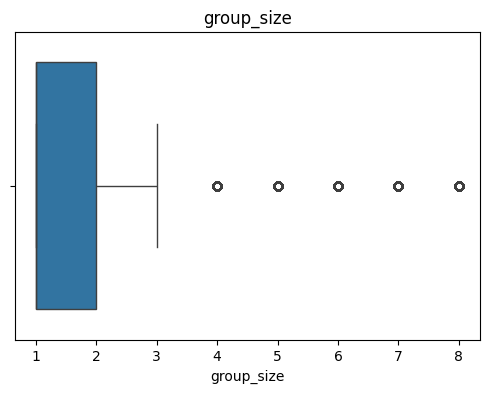

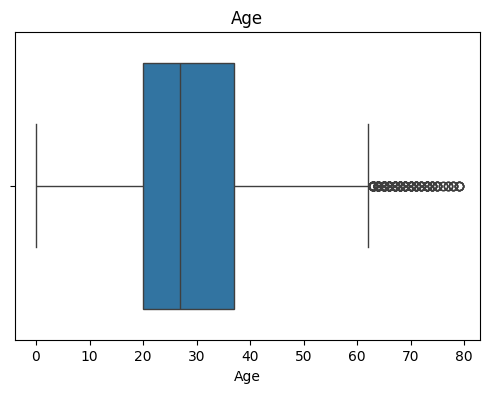

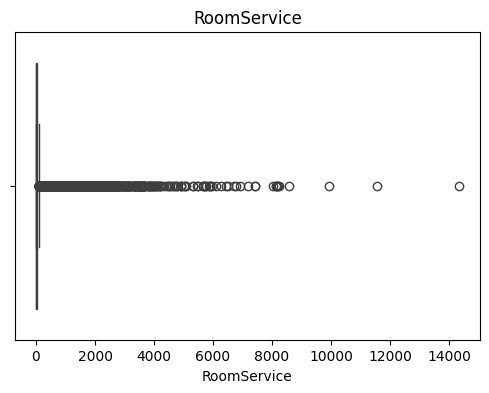

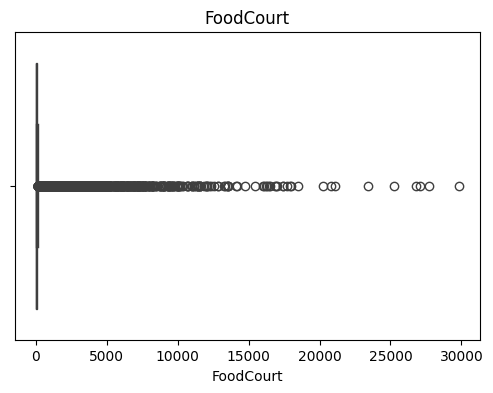

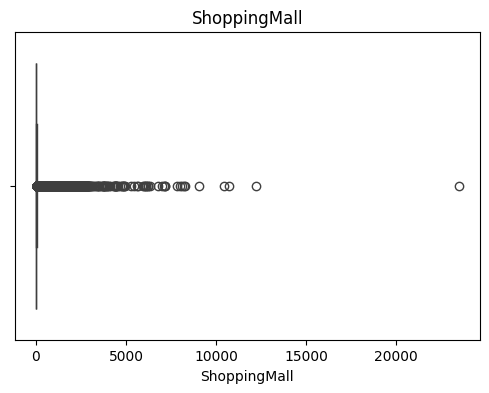

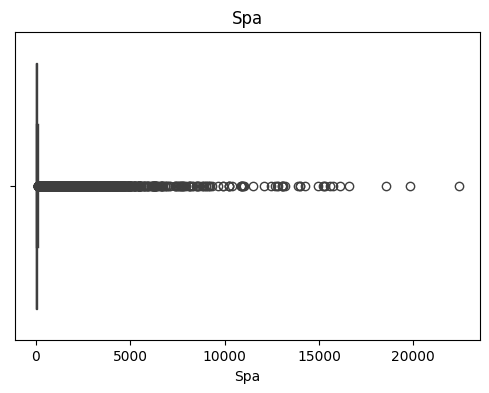

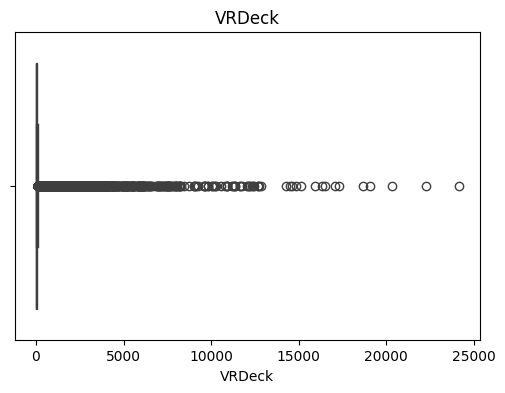

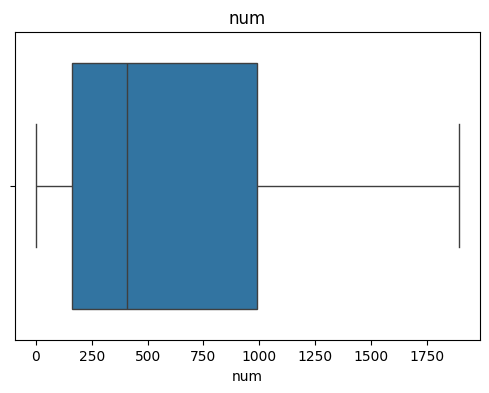

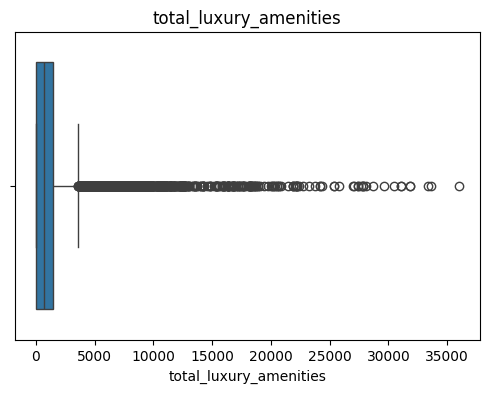

In [54]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col}")
    plt.show()

In [55]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'passenger_group', 'passenger_number_in_group',
       'total_luxury_amenities', 'deck', 'num', 'side', 'first name',
       'last name', 'group_size', 'HomePlanet',
       'cabin_number_distribution_chunk'],
      dtype='object')

In [56]:
df.to_csv('../data/data_before_preprocessing.csv', index = False)